<a href="https://colab.research.google.com/github/mamun216/Exploratory-data-analysis/blob/main/Flight_price_prediction_(feature_engineering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight price prediction(EDA & Feature engineering)

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mount the drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading dataset

In [3]:
train_df = pd.read_excel('/content/drive/MyDrive/Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_df = pd.read_excel('/content/drive/MyDrive/Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
# Merge both train and test data by appending method
df = train_df.append(test_df)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [6]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


# Feature engineering

## Date of journey
This feature contain day, month and year value in object form. We will sort out as different individual feature as date, month and year. 

In [8]:
# split date of journey column into date, month and year
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [10]:
# Convert data type to integer
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [11]:
# Drop the original column Date of journey
df.drop('Date_of_Journey', axis = 1, inplace = True)

## Arrival_time
This feature contain hour and minute together. We will seperate hour and minute in two columns.

In [12]:
# Find the arrival time only
df['Arrival_Time'] = df['Arrival_Time'].str.split().str[0]

In [13]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [14]:
# Split the Arrival_time column into hour and minute
df['Arrival_hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_minute'] = df['Arrival_Time'].str.split(':').str[1]

In [15]:
# Convert datatype into integer
df['Arrival_hour'] = df['Arrival_hour'].astype(int)
df['Arrival_minute'] = df['Arrival_minute'].astype(int)

In [16]:
# Drop the Arrival time column
df.drop('Arrival_Time', axis = 1, inplace = True)

## Departure Time 
As the same way we did for Arrival time we will make new columns as dep_hour and dep_minute, convert the datatype into integer and then drop the original column.

In [17]:
df['Dep_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_minute'] = df['Dep_Time'].str.split(':').str[1]
df['Dep_hour'] = df['Dep_hour'].astype(int)
df['Dep_minute'] = df['Dep_minute'].astype(int)
df.drop('Dep_Time', axis = 1, inplace = True)

In [18]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_minute        0
Dep_hour              0
Dep_minute            0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int64  
 9   Month            13354 non-null  int64  
 10  Year             13354 non-null  int64  
 11  Arrival_hour     13354 non-null  int64  
 12  Arrival_minute   13354 non-null  int64  
 13  Dep_hour         13354 non-null  int64  
 14  Dep_minute       13354 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 1.6+ MB


## Total_stops
Convert this feature into numeric format.

In [20]:
# Show the unique values 
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [21]:
# Check which value has none
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [22]:
# Mapping Total_stops variable to make machine feedable discrete data
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '1 stop':1,'2 stops':2, '3 stops':3,'4 stops':4, 'nan':1})
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [23]:
# drop the route feature which is not needed as we have total no of stops and source and destination features.
df.drop('Route', axis = 1, inplace = True)

In [24]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


## Duration_hour
Keep the hour and minute separate in numeric format from this feature.

In [25]:
df['Duration_hour'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [26]:
df[df['Duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [27]:
# drop the rows which contain value with hour
df.drop(6474, axis = 0, inplace = True)
df.drop(2660, axis = 0, inplace = True)

In [28]:
df['Duration_hour'] = df['Duration_hour'].astype(int)

In [29]:
df['Duration_minute'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [30]:
df['Duration_minute'].value_counts()

30    1818
20    1260
50    1205
45    1154
35    1149
15    1135
55    1121
25    1009
40     803
5      767
10     647
Name: Duration_minute, dtype: int64

In [31]:
df['Duration_minute']= df['Duration_minute'].replace(np.nan, 0)

In [32]:
df['Duration_minute'] = df['Duration_minute'].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration         13351 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Date             13351 non-null  int64  
 8   Month            13351 non-null  int64  
 9   Year             13351 non-null  int64  
 10  Arrival_hour     13351 non-null  int64  
 11  Arrival_minute   13351 non-null  int64  
 12  Dep_hour         13351 non-null  int64  
 13  Dep_minute       13351 non-null  int64  
 14  Duration_hour    13351 non-null  int64  
 15  Duration_minute  13351 non-null  int64  
dtypes: float64(2), int64(9), object(5)
memory usage: 1.7+ MB


In [34]:
df.drop('Duration', axis =1, inplace = True)

In [35]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25


# Feature engineering on remaining categorical feature

In [36]:
# Categorical feature
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Airline'] = labelencoder.fit_transform(df['Airline'])
df['Source'] = labelencoder.fit_transform(df['Source'])
df['Destination'] = labelencoder.fit_transform(df['Destination'])
df['Additional_Info'] = labelencoder.fit_transform(df['Additional_Info'])

In [38]:
# from sklearn.preprocessing import OneHotEncoder
# one = OneHotEncoder()

# df['Airline'] = one.fit_transform(df['Airline'])
# df['Source'] = one.fit_transform(df['Source'])
# df['Destination'] = one.fit_transform(df['Destination'])
# df['Additional_Info'] = one.fit_transform(df['Additional_Info'])

In [39]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2,50
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7,25
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,19,0
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,5,25
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,4,45


In [40]:
# Also use get dummies method
#pd.get_dummies(df, columns = ['Airline', 'Source', 'Destination', 'Additional_Info'], drop_first = True)

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute,Airline_1,Airline_2,Airline_3,Airline_4,Airline_5,Airline_6,Airline_7,Airline_8,Airline_9,Airline_10,Airline_11,Source_1,Source_2,Source_3,Source_4,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Additional_Info_1,Additional_Info_2,Additional_Info_3,Additional_Info_4,Additional_Info_5,Additional_Info_6,Additional_Info_7,Additional_Info_8,Additional_Info_9
0,0.0,3897.0,24,3,2019,1,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,2.0,7662.0,1,5,2019,13,15,5,50,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2.0,13882.0,9,6,2019,4,25,9,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.0,6218.0,12,5,2019,23,30,18,5,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1.0,13302.0,1,3,2019,21,35,16,50,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,NaN,6,6,2019,20,25,20,30,23,55,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2667,0.0,NaN,27,3,2019,16,55,14,20,2,35,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2668,1.0,NaN,6,3,2019,4,25,21,50,6,35,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2669,1.0,NaN,6,3,2019,19,15,4,0,15,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [41]:
# Show the statistical distribution
df.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute
count,13351.000000,13351.000000,13351.000000,13350.000000,13351.000000,10681.000000,13351.000000,13351.000000,13351.0,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000
mean,3.977530,1.953786,1.435248,0.825768,7.407610,9085.898979,13.390607,4.710733,2019.0,13.395776,24.658827,12.512995,24.502659,10.234964,28.347315
std,2.363982,1.178474,1.473404,0.674478,1.198494,4610.921950,8.439749,1.165511,0.0,6.896836,16.557178,5.736678,18.831696,8.473072,16.903136
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,8.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,2.000000,15.000000
50%,4.000000,2.000000,1.000000,1.000000,8.000000,8372.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,8.000000,30.000000
75%,4.000000,3.000000,2.000000,1.000000,8.000000,12373.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,15.000000,45.000000
max,11.000000,4.000000,5.000000,4.000000,9.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


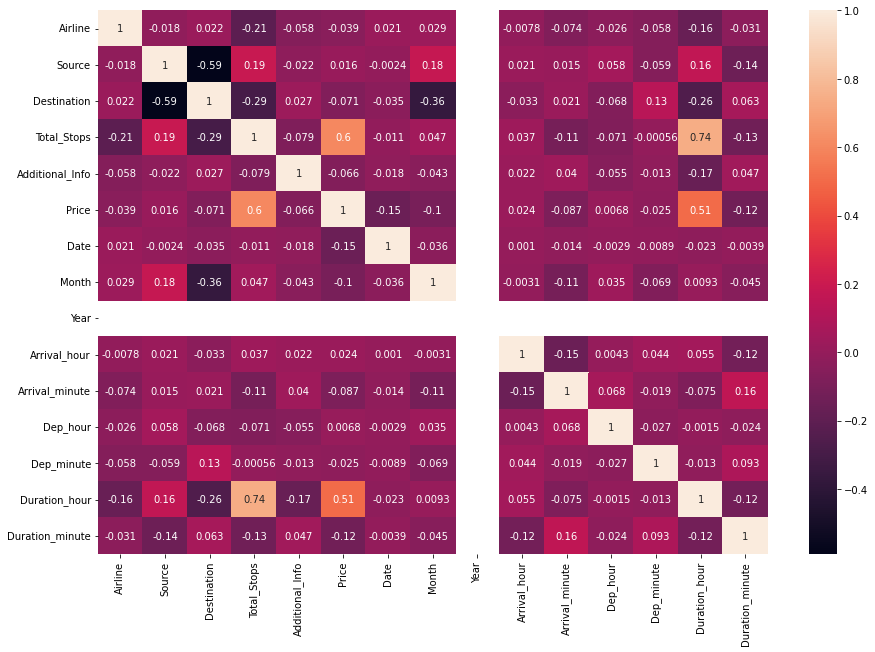

In [44]:
plt.figure(figsize =(15,10))
sns.heatmap(df.corr(), annot = True);

# Conclusion
As this project was only feature engineering task, so did data mungling for machine readble to train the model.